#Stock Data Analysis and Portfolio Simulation using yfinance

Introduction:

This project involves downloading and analyzing historical stock data for Reliance Industries Ltd. (RELIANCE.NS) using Python's yfinance library. It includes calculating technical indicators, plotting key metrics, and simulating a trading strategy to assess the portfolio's performance.

Prerequisites

Before running the notebook, ensure the following libraries are installed:

yfinance: For downloading stock data.

pandas: For data manipulation and analysis.

matplotlib: For data visualization.

In [1]:
!pip install yfinance

In [2]:
import yfinance as yf
import pandas as pd

# Download historical stock data for Reliance Industries Ltd. (RELIANCE.NS)
stock_symbol = "RELIANCE.NS"
data = yf.download(stock_symbol, period="2y")

# Display the first few rows of the data
data.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-08-16,2442.441650,2452.687012,2424.997070,2447.148926,2430.604492,3303689
2022-08-17,2459.794189,2470.777832,2451.071777,2459.932617,2443.301758,3297982
2022-08-18,2455.179199,2463.486084,2436.903809,2456.379150,2447.732666,3705017
2022-08-19,2445.949219,2456.748291,2404.367920,2412.582764,2404.090332,4730362
2022-08-22,2415.490234,2428.688965,2386.877197,2405.890869,2397.422119,4735840


Explanation: 
This section uses yfinance to download two years of historical stock data for Reliance Industries Ltd. The data is stored in a pandas DataFrame for further analysis.

In [3]:
# Calculate the 20-day and 50-day SMAs
data['SMA_20'] = data['Close'].rolling(window=20).mean()
data['SMA_50'] = data['Close'].rolling(window=50).mean()

Explanation: 
The moving averages help smooth out price data to identify trends over specific periods.

In [5]:
# Create a signal column
import numpy as np
data['Signal'] = 0
data['Signal'][20:] = np.where(data['SMA_20'][20:] > data['SMA_50'][20:], 1, 0)  # Buy signal
data['Position'] = data['Signal'].diff()  # Position: 1 (Buy), -1 (Sell)

<ipython-input-5-483b51cd8f88>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Signal'][20:] = np.where(data['SMA_20'][20:] > data['SMA_50'][20:], 1, 0)  # Buy signal


In [6]:
# Display the data with SMA and signals
data[['Close', 'SMA_20', 'SMA_50', 'Signal', 'Position']].tail()

,Close,SMA_20,SMA_50,Signal,Position
Date,,,,,
2024-08-07,2929.649902,3048.410010,3007.407012,1,0.0
2024-08-08,2898.250000,3034.900012,3007.124014,1,0.0
2024-08-09,2948.600098,3024.265015,3008.465015,1,0.0
2024-08-12,2921.250000,3010.655017,3009.896016,1,0.0
2024-08-13,2927.250000,2997.295020,3011.225015,0,-1.0


In [7]:
# Initial capital
initial_capital = 100000

In [8]:
# Create a DataFrame to hold the results
portfolio = pd.DataFrame(index=data.index)
portfolio['Holdings'] = data['Close'] * data['Signal']
portfolio['Cash'] = initial_capital - (data['Close'] * data['Position']).cumsum()
portfolio['Total'] = portfolio['Holdings'] + portfolio['Cash']

In [9]:
# Calculate performance metrics
total_return = portfolio['Total'][-1] - initial_capital
number_of_trades = data['Position'].abs().sum()
winning_trades = len(data[(data['Position'] == 1) & (data['Close'].shift(-1) > data['Close'])])
losing_trades = len(data[(data['Position'] == 1) & (data['Close'].shift(-1) <= data['Close'])])
win_percentage = (winning_trades / number_of_trades) * 100 if number_of_trades > 0 else 0
max_drawdown = (portfolio['Total'].cummax() - portfolio['Total']).max()

<ipython-input-9-c0027511e185>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  total_return = portfolio['Total'][-1] - initial_capital


In [10]:
# Display the results
print(f"Total Return: ₹{total_return:.2f}")
print(f"Number of Trades: {number_of_trades}")
print(f"Winning Trades: {win_percentage:.2f}%")
print(f"Maximum Drawdown: ₹{max_drawdown:.2f}")

Total Return: ₹720.22
Number of Trades: 10.0
Winning Trades: 50.00%
Maximum Drawdown: ₹307.15


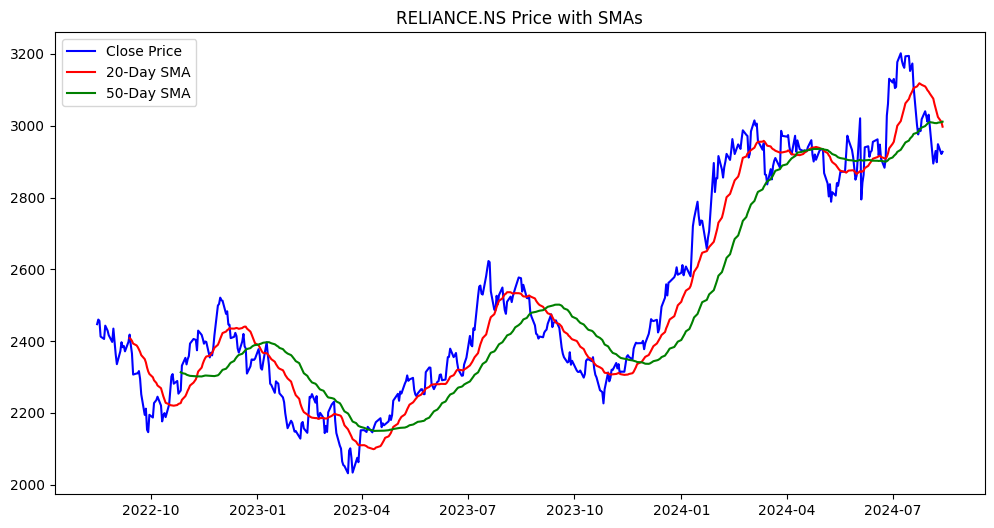

In [13]:
import matplotlib.pyplot as plt

# Plot stock price with SMA
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Close Price', color='blue')
plt.plot(data['SMA_20'], label='20-Day SMA', color='red')
plt.plot(data['SMA_50'], label='50-Day SMA', color='green')
plt.title(f"{stock_symbol} Price with SMAs")
plt.legend()
plt.show()

Explanation: 
This graph shows the closing price along with the 20-day and 50-day SMAs, helping visualize the trend and potential crossovers that may signal buy or sell opportunities.

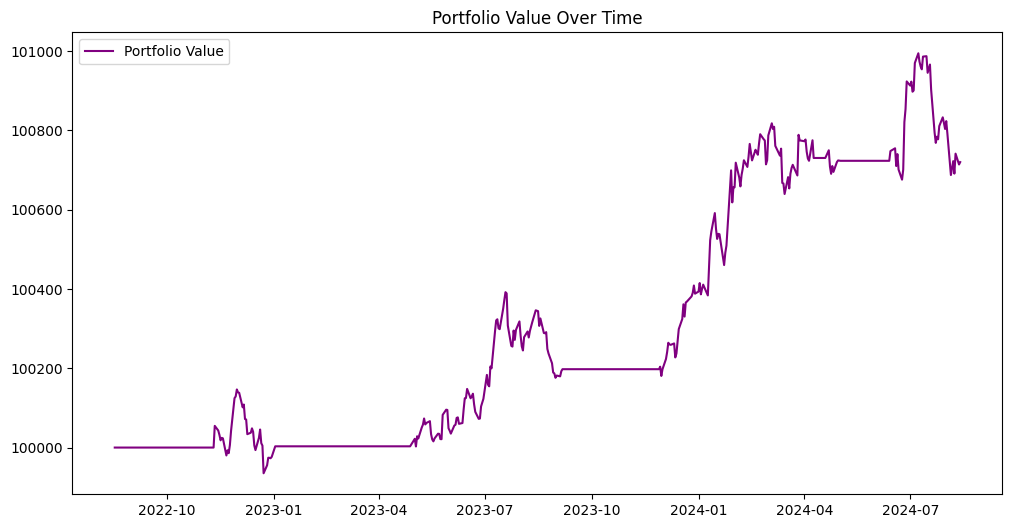

In [14]:
# Plot portfolio value
plt.figure(figsize=(12, 6))
plt.plot(portfolio['Total'], label='Portfolio Value', color='purple')
plt.title('Portfolio Value Over Time')
plt.legend()
plt.show()

Explanation: 
This graph tracks the value of the portfolio over time, providing insight into how the trading strategy impacts the portfolio.

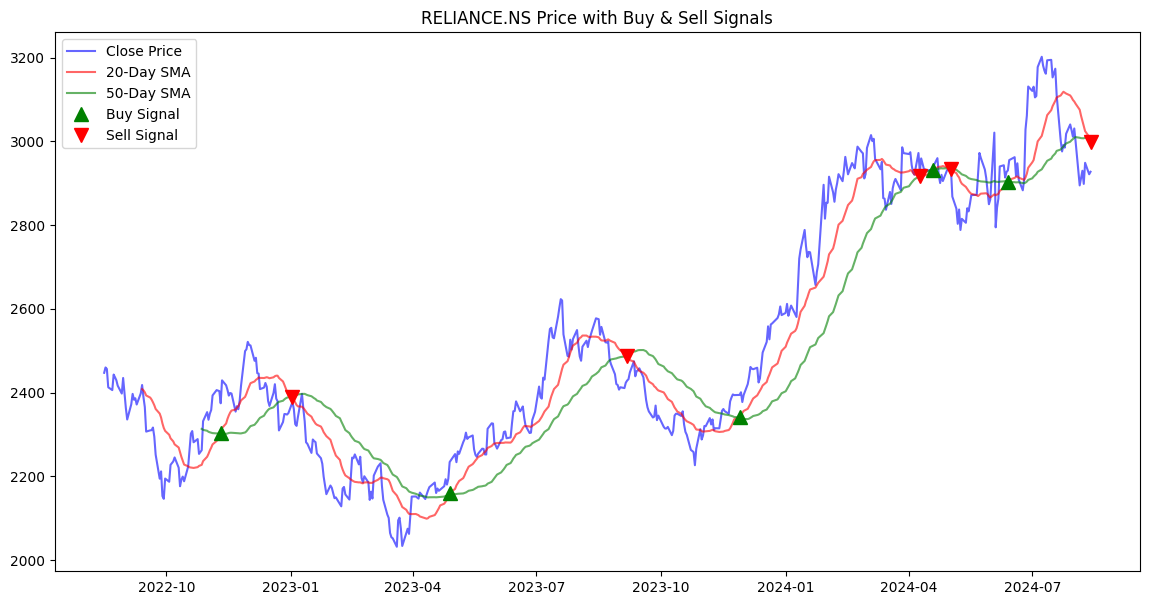

In [16]:
# Plot stock price with Buy and Sell signals
plt.figure(figsize=(14, 7))
plt.plot(data['Close'], label='Close Price', color='blue', alpha=0.6)
plt.plot(data['SMA_20'], label='20-Day SMA', color='red', alpha=0.6)
plt.plot(data['SMA_50'], label='50-Day SMA', color='green', alpha=0.6)

# Plot Buy signals
plt.plot(data[data['Position'] == 1].index, data['SMA_20'][data['Position'] == 1], '^', markersize=10, color='g', label='Buy Signal')

# Plot Sell signals
plt.plot(data[data['Position'] == -1].index, data['SMA_20'][data['Position'] == -1], 'v', markersize=10, color='r', label='Sell Signal')

plt.title(f"{stock_symbol} Price with Buy & Sell Signals")
plt.legend()
plt.show()


Explanation: 
This plot displays buy and sell signals based on SMA crossovers. Green triangles indicate buy signals, and red triangles indicate sell signals.

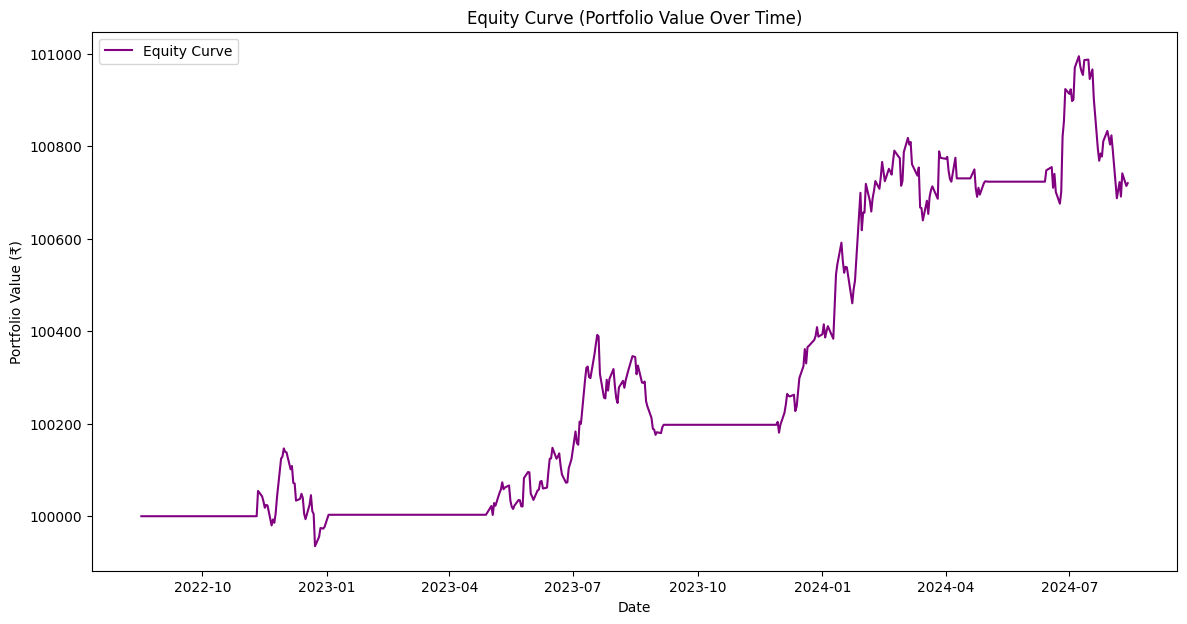

In [17]:
# Plot the equity curve
plt.figure(figsize=(14, 7))
plt.plot(portfolio['Total'], label='Equity Curve', color='purple')
plt.title('Equity Curve (Portfolio Value Over Time)')
plt.xlabel('Date')
plt.ylabel('Portfolio Value (₹)')
plt.legend()
plt.show()


Explanation: The equity curve represents the growth of the portfolio value over time.

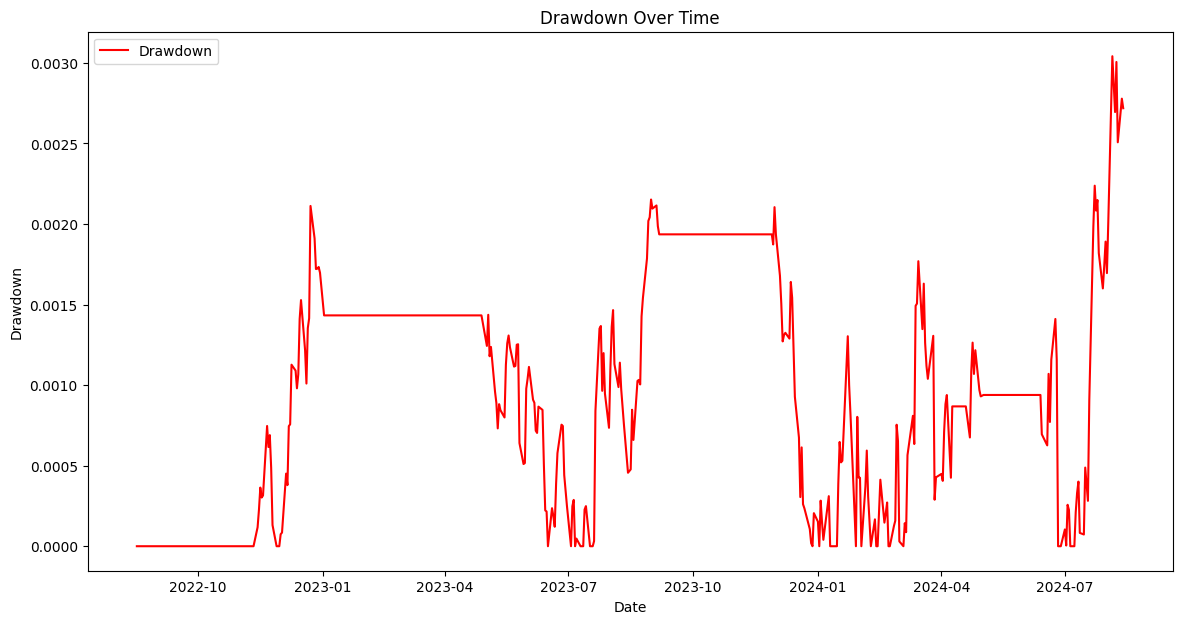

In [18]:
# Calculate drawdown
drawdown = (portfolio['Total'].cummax() - portfolio['Total']) / portfolio['Total'].cummax()

# Plot the drawdown chart
plt.figure(figsize=(14, 7))
plt.plot(drawdown, label='Drawdown', color='red')
plt.title('Drawdown Over Time')
plt.xlabel('Date')
plt.ylabel('Drawdown')
plt.legend()
plt.show()


Explanation: This graph shows the drawdown over time, indicating the decline from the peak portfolio value. It's a key risk metric.

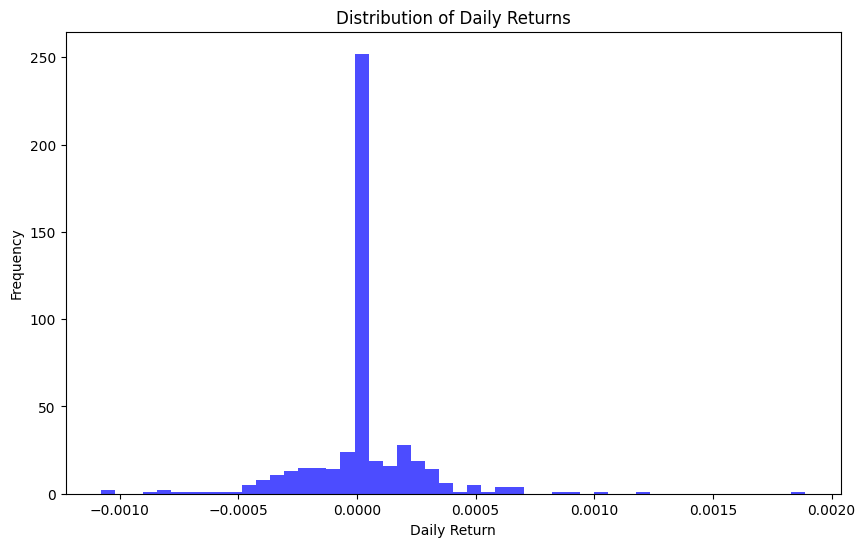

In [19]:
# Calculate daily returns
portfolio['Daily Return'] = portfolio['Total'].pct_change()

# Plot distribution of daily returns
plt.figure(figsize=(10, 6))
plt.hist(portfolio['Daily Return'].dropna(), bins=50, color='blue', alpha=0.7)
plt.title('Distribution of Daily Returns')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.show()


Explanation: This histogram shows the distribution of daily returns, helping assess the volatility and risk associated with the trading strategy.